# EDA

The following documents is the first and general EDA (Examinating Data Analys) of the 17 datasets listed below:
- Alternative Fuel Vehicles US.csv
- Electric and Alternative Fuel Charging Stations.csv
- ElectricCarData_Norm.csv
- ElectricCarData_Clean.csv
- Light Duty Vehicles.csv
- yellow_tripdata_2022-06.parquet
- yellow_tripdata_2023-06.parquet 
- fhv_tripdata_2022-06.parquet
- fhv_tripdata_2023-06.parquet
- green_tripdata_2022-06.parquet
- green_tripdata_2023-06.parquet
- fhvhv_tripdata_2022-06.parquet
- fhvhv_tripdata_2023-06.parquet
- data_reports_monthly.csv
- taxi+_zone_lookup.csv
- taxi_zones.dbf
- Vehicle Fuel Economy Data.csv

## Libraries Used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import math
from sklearn.ensemble import IsolationForest
from dbfread import DBF
import warnings
warnings.filterwarnings("ignore")

## REPORT MONTHLY
### data_reports_monthly.csv
Importing the dataset as a DataFrame

In [2]:
df = pd.read_csv('Datasets\data_reports_monthly.csv')

### Data Dictionary:
-	Month/Year: The month and year in which the data was collected.

-	License Class: The classification or category of the taxi license used.

-	Trips Per Day: The average number of trips made by a taxi on a specific day.

-	Farebox Per Day: The average revenue generated by a taxi on a specific day.

-	Unique Drivers: The number of unique drivers who operated taxis in the time period.

-	Unique Vehicles: The number of unique vehicles used as taxis in the time period.

-	Vehicles Per Day: The average number of taxi vehicles in circulation on a specific day.

-	Avg Days Vehicles on Road: The average number of days a taxi vehicle is in service.

-	Avg Hours Per Day Per Vehicle: The average number of hours a taxi vehicle is in service per day.

-	Avg Days Drivers on Road: The average number of days a taxi driver is on duty.

-	Avg Hours Per Day Per Driver: The average number of hours a taxi driver is on duty per day.

-	Avg Minutes Per Trip: The average number of minutes a taxi trip lasts.

-	Percent of Trips Paid with Credit Card: The percentage of trips paid with credit card.

-	Trips Per Day Shared: The average number of trips shared per day.


In [3]:
df.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2023-08,FHV - Black Car,"21,289",-,"7,470","6,643","3,128",14.6,5.2,14.0,4.9,27.0,-,-
1,2023-08,FHV - High Volume,"591,032",-,"80,823","77,520","54,179",21.7,6.4,21.3,6.2,19.0,-,"4,485"
2,2023-08,FHV - Livery,"23,514",-,"6,169","5,992","3,666",19.0,4.9,18.8,4.8,19.0,-,-
3,2023-08,FHV - Lux Limo,"1,280",-,"1,802","1,730",648,11.6,1.9,11.5,1.9,74.0,-,-
4,2023-08,Green,"1,957","44,903",886,853,471,17.1,3.4,16.7,3.4,15.2,68%,-


### Shape and Dimension

In [5]:
df.shape

(700, 14)

Column Names and Data Types

In [6]:
df.head(6)

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2023-08,FHV - Black Car,"21,289",-,"7,470","6,643","3,128",14.6,5.2,14.0,4.9,27.0,-,-
1,2023-08,FHV - High Volume,"591,032",-,"80,823","77,520","54,179",21.7,6.4,21.3,6.2,19.0,-,"4,485"
2,2023-08,FHV - Livery,"23,514",-,"6,169","5,992","3,666",19.0,4.9,18.8,4.8,19.0,-,-
3,2023-08,FHV - Lux Limo,"1,280",-,"1,802","1,730",648,11.6,1.9,11.5,1.9,74.0,-,-
4,2023-08,Green,"1,957","44,903",886,853,471,17.1,3.4,16.7,3.4,15.2,68%,-
5,2023-08,Yellow,"90,485","2,282,464","11,442","8,341","6,933",25.8,7.8,21.7,6.7,15.9,79%,-


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Month/Year                              700 non-null    object 
 1   License Class                           700 non-null    object 
 2   Trips Per Day                           700 non-null    object 
 3   Farebox Per Day                         700 non-null    object 
 4   Unique Drivers                          700 non-null    object 
 5   Unique Vehicles                         700 non-null    object 
 6   Vehicles Per Day                        700 non-null    object 
 7   Avg Days Vehicles on Road               700 non-null    float64
 8   Avg Hours Per Day Per Vehicle           700 non-null    float64
 9   Avg Days Drivers on Road                700 non-null    float64
 10  Avg Hours Per Day Per Driver            700 non-null    float6

We convert some columns to int for analysis.

In [8]:
for columna in df.columns[2:7]:
    df[columna] = df[columna].astype(str)  
    df[columna] = df[columna].str.replace(',', '') 
    df[columna] = df[columna].str.replace('-', '0')  
    df[columna] = df[columna].astype(int)

### Data Information

Duplicates

In [9]:
df[df.duplicated()].shape

(0, 14)

Missing and Null Values

In [10]:
df.isnull().sum()

Month/Year                                0
License Class                             0
Trips Per Day                             0
Farebox Per Day                           0
Unique Drivers                            0
Unique Vehicles                           0
Vehicles Per Day                          0
Avg Days Vehicles on Road                 0
Avg Hours Per Day Per Vehicle             0
Avg Days Drivers on Road                  0
Avg Hours Per Day Per Driver              0
Avg Minutes Per Trip                      0
Percent of Trips Paid with Credit Card    0
Trips Per Day Shared                      0
dtype: int64

### Summary Statistics and Data Distribution

In [11]:
df.describe()

,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip
count,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,155008.380000,1.059468e+06,17818.977143,14556.161429,10126.257143,19.966857,6.365857,18.255143,5.284857,19.661857
std,207177.735183,1.992286e+06,21909.819227,20818.745306,14052.338017,5.466400,3.699707,3.607644,1.944472,17.974755
min,148.000000,0.000000e+00,129.000000,114.000000,33.000000,6.700000,1.900000,6.800000,1.800000,0.000000
25%,12161.500000,0.000000e+00,3785.250000,3571.750000,2020.000000,15.400000,3.600000,15.400000,3.600000,12.600000
50%,35959.500000,0.000000e+00,7273.500000,6781.500000,3989.500000,19.800000,5.500000,19.400000,5.350000,15.800000
75%,303502.250000,6.741760e+05,28386.500000,13323.250000,12169.000000,23.800000,6.800000,21.300000,6.600000,20.000000
max,769729.000000,6.744373e+06,87779.000000,86540.000000,59902.000000,30.100000,15.300000,23.200000,8.500000,75.000000


### Outliers

In [12]:
# Select the numeric columns
numeric_cols = df.select_dtypes(include=['int', 'float'])
# Calculate the IQR for each column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
print(df[outliers])

    Month/Year      License Class  Trips Per Day  Farebox Per Day  \
1      2023-08  FHV - High Volume         591032                0   
3      2023-08     FHV - Lux Limo           1280                0   
5      2023-08             Yellow          90485          2282464   
6      2023-07  FHV - High Volume         617161                0   
8      2023-07     FHV - Lux Limo            933                0   
..         ...                ...            ...              ...   
695    2010-05             Yellow         499374          5561218   
696    2010-04             Yellow         504798          5502545   
697    2010-03             Yellow         415567          3011750   
698    2010-02             Yellow         397969          3392416   
699    2010-01             Yellow         479376          4968817   

     Unique Drivers  Unique Vehicles  Vehicles Per Day  \
1             80823            77520             54179   
3              1802             1730               648 

Algorithm for detecting Outliers

In [13]:
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(numeric_cols)
outliers = outliers == -1  # The rows labeled as -1 are outliers.
print(df[outliers])

    Month/Year      License Class  Trips Per Day  Farebox Per Day  \
18     2023-05  FHV - High Volume         640244                0   
30     2023-03  FHV - High Volume         658499                0   
168    2021-04  FHV - High Volume         470377                0   
180    2021-02  FHV - High Volume         414782                0   
222    2020-07  FHV - High Volume         320999                0   
236    2020-05     FHV - Lux Limo            191                0   
242    2020-04     FHV - Lux Limo            148                0   
246    2020-03  FHV - High Volume         432027                0   
250    2020-03             Yellow          97004          1620621   
252    2020-02  FHV - High Volume         749129                0   
258    2020-01  FHV - High Volume         663524                0   
264    2019-12  FHV - High Volume         717517                0   
270    2019-11  FHV - High Volume         721170                0   
276    2019-10  FHV - High Volume 

We explore what years our dataset contains

In [14]:
df['Month/Year'].unique()

array(['2023-08', '2023-07', '2023-06', '2023-05', '2023-04', '2023-03',
       '2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09',
       '2022-08', '2022-07', '2022-06', '2022-05', '2022-04', '2022-03',
       '2022-02', '2022-01', '2021-12', '2021-11', '2021-10', '2021-09',
       '2021-08', '2021-07', '2021-06', '2021-05', '2021-04', '2021-03',
       '2021-02', '2021-01', '2020-12', '2020-11', '2020-10', '2020-09',
       '2020-08', '2020-07', '2020-06', '2020-05', '2020-04', '2020-03',
       '2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09',
       '2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03',
       '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09',
       '2018-08', '2018-07', '2018-06', '2018-05', '2018-04', '2018-03',
       '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09',
       '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03',
       '2017-02', '2017-01', '2016-12', '2016-11', 

We observe the Yellow taxi service to see how it effectively decreases over time

In [15]:
df[df['License Class']=='Yellow']

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
5,2023-08,Yellow,90485,2282464,11442,8341,6933,25.8,7.8,21.7,6.7,15.9,79%,-
10,2023-07,Yellow,93315,2347673,11396,8306,6811,25.4,7.9,21.5,6.8,18.3,79%,-
16,2023-06,Yellow,109766,2802472,11736,8384,7171,25.7,8.4,21.5,7.2,16.6,81%,-
22,2023-05,Yellow,112843,2867319,11661,8317,7186,26.8,8.6,22.4,7.3,16.8,81%,-
28,2023-04,Yellow,109071,2704765,11236,8172,6916,25.4,8.4,21.5,7.3,15.9,80%,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2010-05,Yellow,499374,5561218,30950,13309,12729,29.6,14.8,22.7,8.3,0.0,35%,-
696,2010-04,Yellow,504798,5502545,30827,13326,12856,28.9,14.8,22.3,8.3,0.0,35%,-
697,2010-03,Yellow,415567,3011750,28709,12183,10382,26.4,15.1,20.4,8.3,11.5,35%,-
698,2010-02,Yellow,397969,3392416,28255,12171,10045,23.1,14.6,17.6,8.3,11.1,35%,-


We compare the number of trips for each type of service in a month

In [16]:
df[df['Month/Year']=='2023-06'][['License Class','Trips Per Day']]

,License Class,Trips Per Day
11,FHV - Black Car,17742
12,FHV - High Volume,645549
13,FHV - Livery,22559
14,FHV - Lux Limo,1245
15,Green,2184
16,Yellow,109766


Once again we verify how as the number of trips by type of Non-FHV (Yellow-Green) service decreases, they increase in the FHV type. This confirms that the investment should be made in the FHV segment.

## TAXI ZONE LOOKUP
### taxi+_zone_lookup.csv

Importing the dataset as a DataFrame

In [17]:
data = pd.read_csv('Datasets\\taxi+_zone_lookup.csv')

### Data Dictionary:
- LocationID: It is a unique identifier.
- Borough: Name of the district within New York City.
- Zone: Name of a zone or area within a specific borough.
- service_zone: Describe the service zone or service category associated with a location.

In [18]:
data.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### Shape and Dimension

In [20]:
data.shape

(265, 4)

Column Names and Data Types

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [22]:
data.dtypes.value_counts()

object    3
int64     1
Name: count, dtype: int64

### Data Information

Duplicates

In [23]:
data.drop_duplicates()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Bar charts of the category distribution of the Borough and service_zone columns

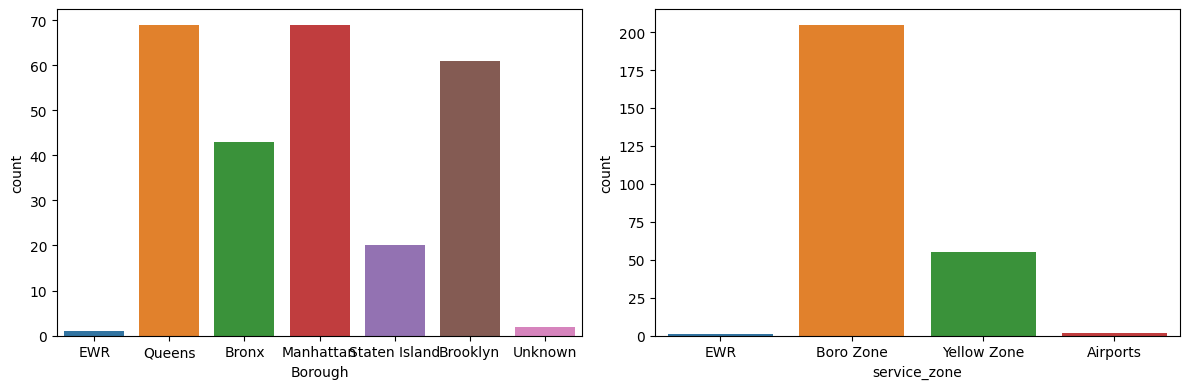

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.countplot(data=data, x='Borough')
plt.subplot(122)
sns.countplot(data=data, x='service_zone')
plt.tight_layout()
plt.show()

Frequency table for zone, service zone and borough columns

In [25]:
frequency_table_borough = data['Borough'].value_counts().reset_index()
frequency_table_borough.columns = ['Borough', 'Count']
frequency_table_zone = data['Zone'].value_counts().reset_index()
frequency_table_zone.columns = ['Zone', 'Count']
frequency_table_service_zone = data['service_zone'].value_counts().reset_index()
frequency_table_service_zone.columns = ['Service Zone', 'Count']

In [26]:
frequency_table_borough

,Borough,Count
0,Queens,69
1,Manhattan,69
2,Brooklyn,61
3,Bronx,43
4,Staten Island,20
5,Unknown,2
6,EWR,1


In [27]:
frequency_table_zone

,Zone,Count
0,Governor's Island/Ellis Island/Liberty Island,3
1,Corona,2
2,Newark Airport,1
3,Ocean Hill,1
4,Parkchester,1
...,...,...
256,Fordham South,1
257,Forest Hills,1
258,Forest Park/Highland Park,1
259,Fort Greene,1


In [28]:
frequency_table_service_zone

,Service Zone,Count
0,Boro Zone,205
1,Yellow Zone,55
2,Airports,2
3,EWR,1


Missing and Null Values

In [29]:
data.isna().sum()

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

## TAXI ZONE
### taxi_zones.dbf
Importing the dataset as a DataFrame

In [30]:
path_file = 'Datasets\\taxi_zones.dbf'
# Utiliza la función DBF para abrir el archivo DBF y crear una lista de diccionarios
registros = []
with DBF(path_file) as dbf:
    for registro in dbf:
        registros.append(dict(registro))

# Convierte la lista de diccionarios en un DataFrame de pandas
df = pd.DataFrame(registros)

### Data Dictionary:
- OBJECTID – Unique identifier or “Object ID” for each record or row in the data set.
- Shape Leng: Represents the geospatial length associated with a location.
- Shape Area: Represent the geospatial area associated with a location.
- Zone: Name of a zone or area within a specific borough.
- LocationID: It is a unique identifier.
- Borough: Name of the district within New York City.

In [31]:
df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island


### Shape and Dimension

In [33]:
df.shape

(263, 6)

Column Names and Data Types

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   Shape_Area  263 non-null    float64
 3   zone        263 non-null    object 
 4   LocationID  263 non-null    int64  
 5   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 12.5+ KB


In [35]:
df.dtypes

OBJECTID        int64
Shape_Leng    float64
Shape_Area    float64
zone           object
LocationID      int64
borough        object
dtype: object

In [36]:
df.dtypes.value_counts()

int64      2
float64    2
object     2
Name: count, dtype: int64

### Data Information

Duplicates

In [37]:
df.duplicated().sum()

0

In [38]:
df.drop_duplicates()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,260,0.133514,0.000422,Woodside,260,Queens
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,262,0.049064,0.000122,Yorkville East,262,Manhattan


Missing and Null Values

In [39]:
df.isna().sum()

OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
dtype: int64

### Summary Statistics and Data Distribution


In [40]:
df.describe(include='all')

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
count,263.000000,263.000000,263.000000,263,263.000000,263
unique,NaN,NaN,NaN,260,NaN,6
top,NaN,NaN,NaN,Governor's Island/Ellis Island/Liberty Island,NaN,Queens
freq,NaN,NaN,NaN,3,NaN,69
mean,132.000000,0.094269,0.000402,NaN,131.984791,NaN
std,76.065761,0.054594,0.000482,NaN,76.073787,NaN
min,1.000000,0.014306,0.000006,NaN,1.000000,NaN
25%,66.500000,0.054722,0.000133,NaN,66.500000,NaN
50%,132.000000,0.084341,0.000268,NaN,132.000000,NaN
75%,197.500000,0.119488,0.000480,NaN,197.500000,NaN


Distribution graph of the values of the Shape_Area and Shape_Leng columns

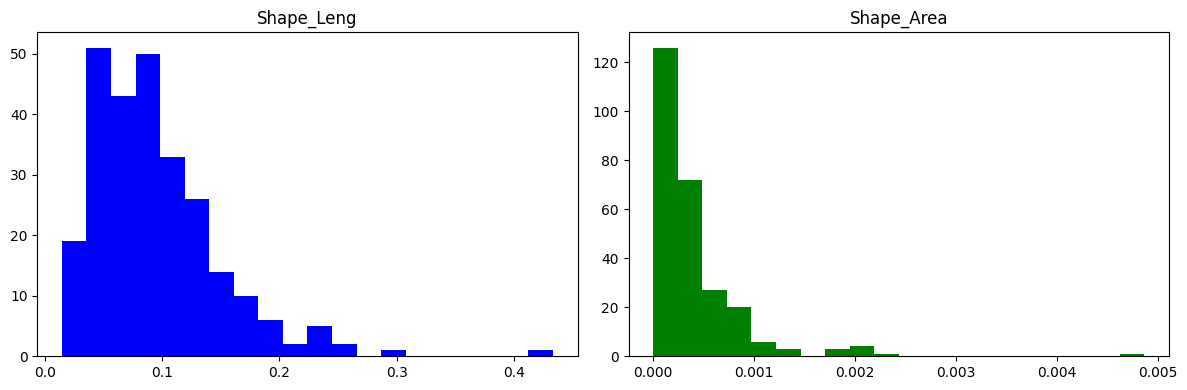

In [41]:
# 'Shape_Leng'
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(df['Shape_Leng'], bins=20, color='blue')
plt.title('Shape_Leng')

# Visualización de la distribución de 'Shape_Area'
plt.subplot(122)
plt.hist(df['Shape_Area'], bins=20, color='green')
plt.title('Shape_Area')

plt.tight_layout()
plt.show()

Frequency table for zone and borough columns

In [42]:
frequency_table_borough = df['borough'].value_counts().reset_index()
frequency_table_borough.columns = ['borough', 'Count']
frequency_table_zone = df['zone'].value_counts().reset_index()
frequency_table_zone.columns = ['zone', 'Count']

In [43]:
frequency_table_borough

,borough,Count
0,Queens,69
1,Manhattan,69
2,Brooklyn,61
3,Bronx,43
4,Staten Island,20
5,EWR,1


In [44]:
frequency_table_zone

,zone,Count
0,Governor's Island/Ellis Island/Liberty Island,3
1,Corona,2
2,Newark Airport,1
3,Oakwood,1
4,Park Slope,1
...,...,...
255,Fordham South,1
256,Forest Hills,1
257,Forest Park/Highland Park,1
258,Fort Greene,1


We use this dataset to classify trips through different areas of the city

## VEHICLE FUEL ECONOMY
### Vehicle Fuel Economy Data.csv

Importing the dataset as a DataFrame

In [45]:
df = pd.read_csv('Datasets\Vehicle Fuel Economy Data.csv') 

### Data Dictionary:
-	Year: The year of manufacture of the vehicle.

-	Manufacturer: The manufacturer or brand of the vehicle.

-	Model: The specific model of the vehicle.

-	barrels08: The number of barrels of fuel consumed by the vehicle in city (city) in a year.

-	barrelsA08: The number of barrels of fuel consumed by the vehicle on the road (highway) in a year.

-	charge240: Electrical charge in the 240 volt range.

-	city08: Fuel consumption in miles per gallon (MPG) in the city.

-	city08U: Fuel consumption in miles per gallon in the city (adjusted).

-	cityA08: Fuel consumption in miles per gallon in the city (alternative).

-	cityA08U: Fuel consumption in miles per gallon in the city (alternate, adjusted).

-	cityCD: Fuel consumption in miles per gallon (MPG) in the city (diesel).

-	cityE: Fuel consumption in miles per gallon in the city (electric).

-	cityUF: Fuel consumption in miles per gallon in the city (alternative fuel).

-	co2: Carbon dioxide (CO2) emissions in grams per mile.

-	co2A: CO2 emissions in grams per mile (alternative).

-	co2TailpipeAGpm: CO2 emissions in grams per mile (tailpipe, alternative to gasoline).

-	co2TailpipeGpm: CO2 emissions in grams per mile (tailpipe, gasoline).

-	comb08: Combined fuel consumption in miles per gallon (MPG).

-	comb08U: Combined fuel consumption in miles per gallon (adjusted).

-	combA08: Combined fuel consumption in miles per gallon (alternative).

-	combA08U: Combined fuel consumption in miles per gallon (alternate, adjusted).

-	combE: Combined fuel consumption in miles per gallon (electric).

-	combinedCD: Combined fuel consumption in miles per gallon (diesel).

-	combinedUF: Combined fuel consumption in miles per gallon (alternative fuel).

-	cylinders: The number of cylinders in the vehicle's engine.

-	displ: The displacement of the engine in liters.

-	drive: The type of drive of the vehicle.

-	engId: Engine identifier.

-	eng_dscr: Engine description.

-	feScore: Fuel efficiency score.

-	fuelCost08: Estimated annual fuel cost for the vehicle.

-	fuelCostA08: Estimated annual fuel cost (alternative).

-	fuelType: Type of fuel used by the vehicle.

-	fuelType1: Type of primary fuel used by the vehicle.

-	ghgScore: Greenhouse gas emissions score.

-	ghgScoreA: Greenhouse Gas Emissions Score (alternative).

-	highway08: Fuel consumption in miles per gallon on the highway.

-	highway08U: Highway fuel consumption in miles per gallon (adjusted).

-	highwayA08: Fuel consumption in miles per gallon on the highway (alternative).

-	highwayA08U: Highway fuel consumption in miles per gallon (alternate, adjusted).

-	VClass: The class or category of the vehicle (example: sedan, SUV, truck).

-	highwayCD: Fuel consumption in miles per gallon on the highway (diesel).

-	highwayE: Fuel consumption in miles per gallon on the highway (electric).

-	highwayUF: Highway fuel consumption in miles per gallon (alternative fuel).

-	hlv: Payload of light vehicles.

-	hpv: Payload of heavy vehicles.

-	id: Unique vehicle identifier.

-	lv2: Emissions level 2.

-	lv4: Emissions level 4.

-	mpgData: Information about fuel consumption.

-	phevBlended: Plug-in hybrid vehicle indicator.

-	pv2: Greenhouse gas emissions level 2.

-	pv4: Greenhouse gas emissions level 4.

-	range: Driving range of the vehicle.

-	rangeCity: Driving range in city.

-	rangeCityA: City driving range (alternative).

-	rangeHwy: Highway driving range.

-	rangeHwyA: Highway driving range (alternate).

-	trany: The type of vehicle transmission (automatic, manual, etc.).

-	UCity: Fuel consumption in miles per gallon in the city, adjusted for specific factors.

-	UCityA: Fuel consumption in miles per gallon in the city (alternative, adjusted).

-	UHighway: Fuel consumption in miles per gallon on the highway, adjusted for specific factors.

-	UHighwayA: Highway fuel consumption in miles per gallon (alternate, adjusted).

-	youSaveSpend: Information on how much you save or spend on fuel compared to an average vehicle.

-	guzzler: Information about whether the vehicle is considered a "guzzler" (excessive fuel guzzler).

-	trans_dscr: Description of the vehicle transmission.

-	tCharger: Turbo charger indicator.

-	sCharger: Supercharger indicator.

-	atvType: Type of off-road vehicle (if applicable).

-	fuelType2: Secondary fuel type (if applicable).

-	rangeA: Alternative driving range.

-	evMotor: Information about the electric motor (if applicable).

-	mfrCode: Manufacturer code.

-	c240Dsc a: Description of the vehicle with 240 volt electrical charging.

-	charge240b: Information about 240 volt charging (alternative).

-	c240bDscr: Description of 240 volt charging (alternative).

-	createdOn: Data creation date.

-	modifiedOn: Data modification date.

-	startStop: Information about the vehicle's start/stop system.

-	phevCity: City fuel consumption for plug-in hybrid vehicles.

-	phevHwy: Highway fuel consumption for plug-in hybrid vehicles.

-	phevComb: Combined fuel consumption for plug-in hybrid vehicles.

In [46]:
df.head()

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0


### Shape and Dimension

In [48]:
df.shape

(46186, 82)

Column Names and Data Types

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46186 non-null  int64  
 1   Manufacturer     46186 non-null  object 
 2   Model            46176 non-null  object 
 3   barrels08        46169 non-null  float64
 4   barrelsA08       46169 non-null  float64
 5   charge240        46169 non-null  float64
 6   city08           46169 non-null  float64
 7   city08U          46169 non-null  float64
 8   cityA08          46169 non-null  float64
 9   cityA08U         46169 non-null  float64
 10  cityCD           46169 non-null  float64
 11  cityE            46169 non-null  float64
 12  cityUF           46169 non-null  float64
 13  co2              46169 non-null  float64
 14  co2A             46169 non-null  float64
 15  co2TailpipeAGpm  46169 non-null  float64
 16  co2TailpipeGpm   46169 non-null  float64
 17  comb08      

In [50]:
df.dtypes

Year              int64
Manufacturer     object
Model            object
barrels08       float64
barrelsA08      float64
                 ...   
modifiedOn       object
startStop        object
phevCity        float64
phevHwy         float64
phevComb        float64
Length: 82, dtype: object

In [51]:
df.dtypes.value_counts()

float64    57
object     24
int64       1
Name: count, dtype: int64

In [52]:
df.columns

Index(['Year', 'Manufacturer', 'Model', 'barrels08', 'barrelsA08', 'charge240',
       'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF',
       'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'VClass',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'youSaveSpend', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn',
       'modifiedOn', 's

### Data Information

Duplicates

In [53]:
df.duplicated().sum()

52

In [54]:
df.drop_duplicates()

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46181,1993,Plymouth,Sundance/Duster,12.935217,0.0,0.0,21.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,01-01-2013,01-01-2013,NaN,0.0,0.0,0.0
46182,1993,Pontiac,Grand Am,14.167143,0.0,0.0,18.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,01-01-2013,01-01-2013,NaN,0.0,0.0,0.0
46183,1993,Saab,900,14.167143,0.0,0.0,18.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46184,1993,Subaru,Legacy,13.523182,0.0,0.0,19.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,01-01-2013,01-01-2013,NaN,0.0,0.0,0.0


Number of Unique values in each column

In [55]:
df.nunique()

Year              41
Manufacturer     142
Model           4783
barrels08        285
barrelsA08         8
                ... 
modifiedOn       280
startStop          2
phevCity          54
phevHwy           52
phevComb          51
Length: 82, dtype: int64

Missing and Null Values

In [56]:
df.isna().sum()

Year                0
Manufacturer        0
Model              10
barrels08          17
barrelsA08         17
                ...  
modifiedOn       2016
startStop       31829
phevCity         2016
phevHwy          2016
phevComb         2016
Length: 82, dtype: int64

In [57]:
df.isnull().sum().sort_values(ascending=False).head(20)

c240bDscr     46059
c240Dscr      46053
sCharger      45199
rangeA        44544
fuelType2     44539
evMotor       44312
guzzler       43551
atvType       41800
tCharger      37655
startStop     31829
trans_dscr    31795
mfrCode       30986
eng_dscr      17094
phevComb       2016
charge240b     2016
createdOn      2016
modifiedOn     2016
phevCity       2016
phevHwy        2016
mpgData        2007
dtype: int64

### Summary Statistics and Data Distribution


In [58]:
df.describe()

,Year,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,46186.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,...,44192.000000,44192.000000,44192.000000,44192.000000,44192.000000,44192.000000,44170.000000,44170.000000,44170.000000,44170.000000
mean,2003.733079,15.306719,0.166865,0.114687,19.167493,7.965150,0.843618,0.701921,0.000238,0.701618,...,0.164464,24.554556,1.107372,35.704448,0.866718,-5093.925371,0.014150,0.283858,0.286710,0.283903
std,12.252017,4.343434,0.869974,1.012054,10.448985,14.226484,6.450475,6.316454,0.033236,5.649704,...,2.477254,15.141158,9.236931,13.782685,5.869861,4258.449576,0.296926,3.845646,3.723701,3.766720
min,1984.000000,0.047081,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-37250.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,12.935217,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.749900,0.000000,28.300000,0.000000,-7750.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,14.875500,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,22.000000,0.000000,34.000000,0.000000,-4750.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,17.500588,0.000000,0.000000,21.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,26.666700,0.000000,40.000000,0.000000,-2250.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,42.501429,16.000000,19.000000,153.000000,153.000000,145.000000,145.000000,5.000000,122.000000,...,114.000000,224.800000,207.000000,187.100000,173.000000,7000.000000,9.000000,97.000000,81.000000,88.000000


### Histogram

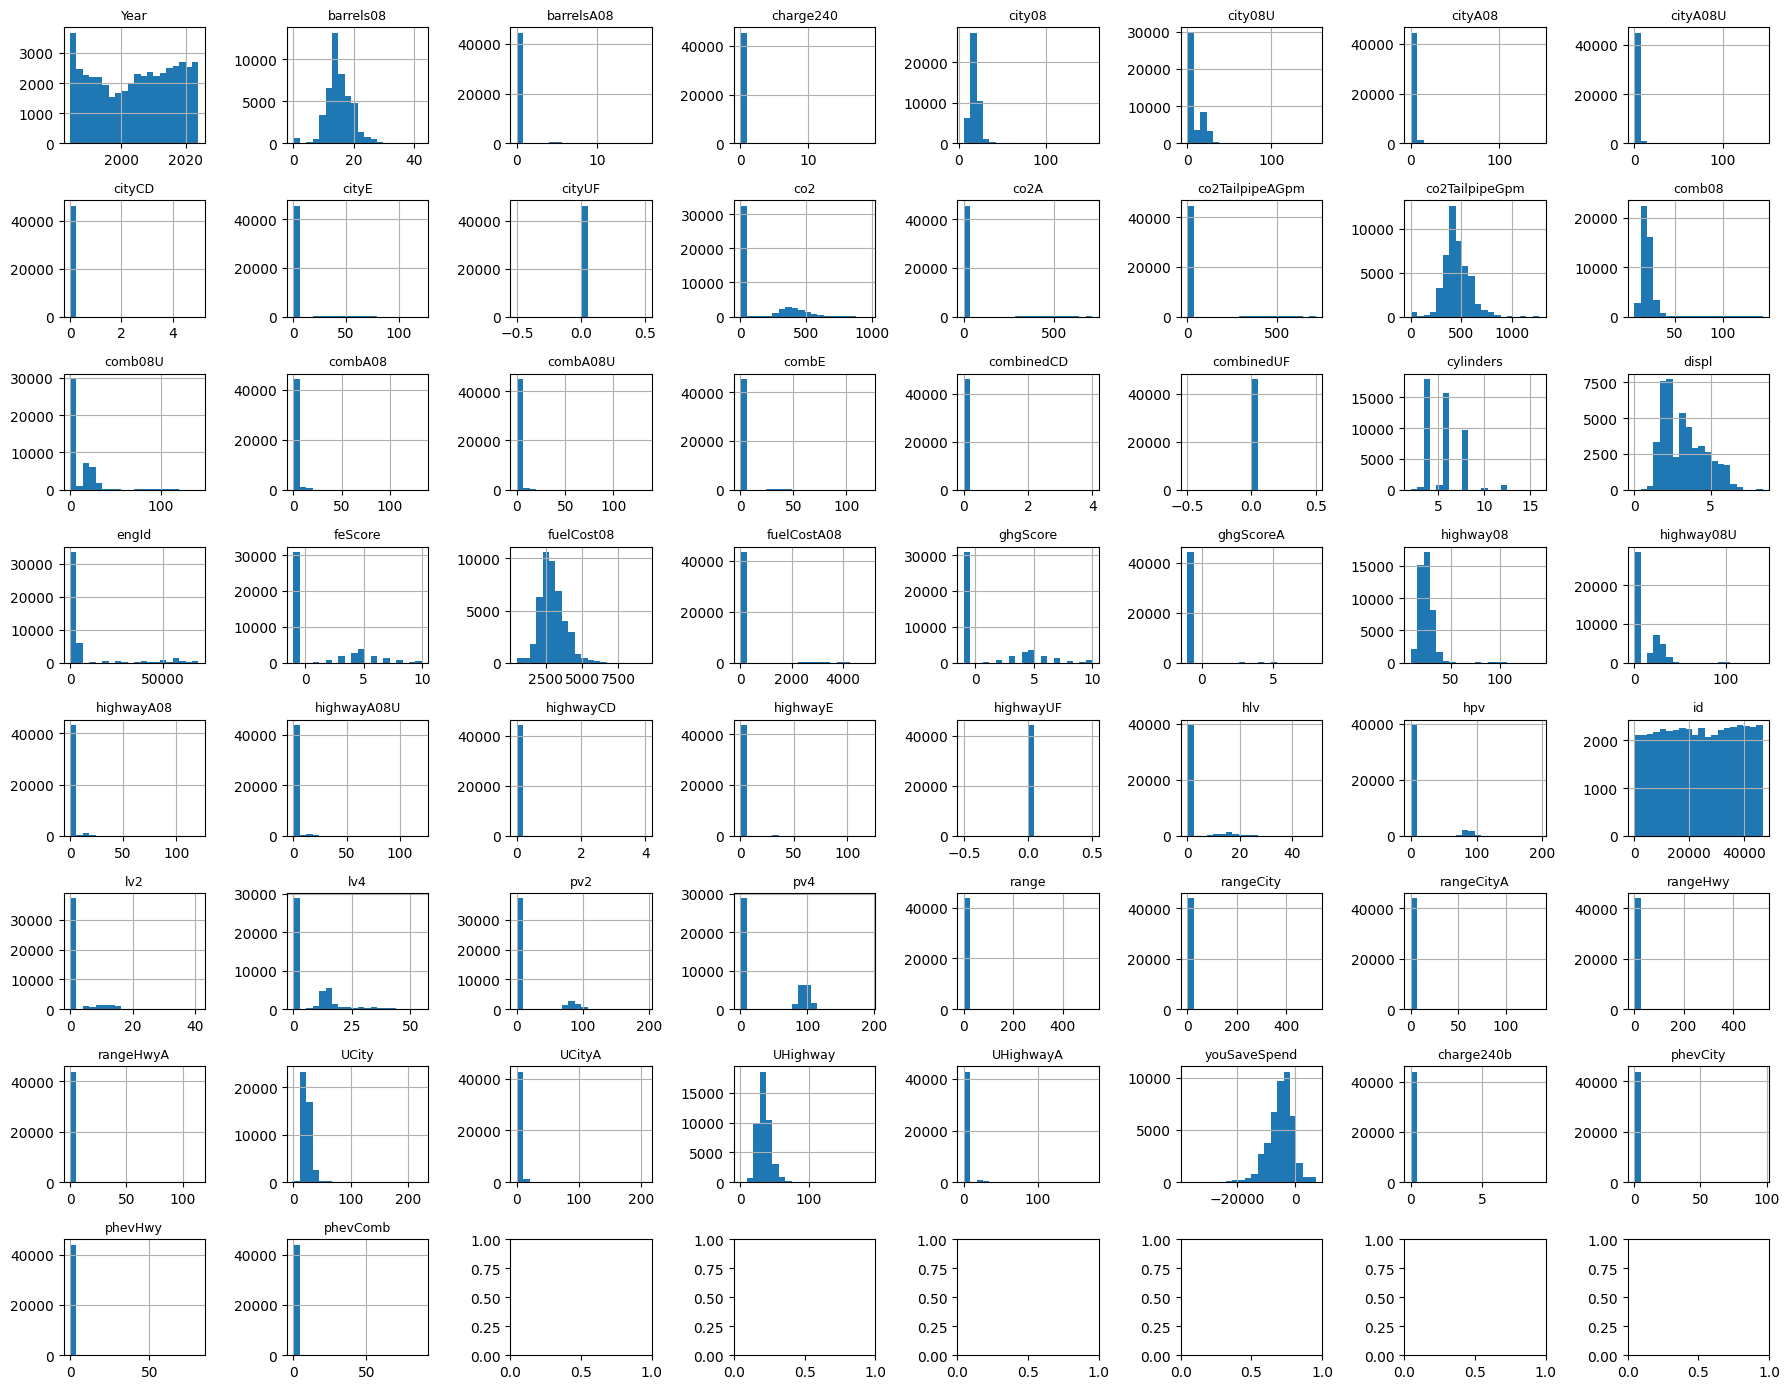

In [59]:
numeric_cols = df.select_dtypes(include=['int', 'float'])
n_cols = numeric_cols.shape[1]
n_rows = 8 

# Calculate the necessary number of columns to display all the subplots.
n_cols_per_row = math.ceil(n_cols / n_rows)

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(18, 14))  
for i, col in enumerate(numeric_cols.columns):
    row, col_idx = divmod(i, n_cols_per_row)
    ax = axes[row, col_idx]
    ax.set_title(col, fontsize=9)
    numeric_cols[col].hist(bins=20, ax=ax)


for i in range(n_cols_per_row * n_rows, n_cols):
    fig.delaxes(axes[i // n_cols_per_row, i % n_cols_per_row])

plt.tight_layout()
plt.show()


### Outliers

In [60]:
# Select the numeric columns
numeric_cols = df.select_dtypes(include=['int', 'float'])
numeric_cols=numeric_cols.dropna()

In [61]:
# Calculate the IQR for each column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
print(numeric_cols[outliers])

       Year  barrels08  barrelsA08  charge240  city08  city08U  cityA08  \
0      2017  17.500588         0.0        0.0    15.0     14.0      0.0   
3      2017  11.018889         0.0        0.0    24.0     23.0      0.0   
10     2017  16.528333         0.0        0.0    15.0     15.0      0.0   
11     2017  18.594375         0.0        0.0    13.0     12.0      0.0   
17     2017   9.597097         0.0        0.0    27.0     26.0      0.0   
...     ...        ...         ...        ...     ...      ...      ...   
46178  1993  16.528333         0.0        0.0    16.0      0.0      0.0   
46179  1993  12.396250         0.0        0.0    21.0      0.0      0.0   
46181  1993  12.935217         0.0        0.0    21.0      0.0      0.0   
46184  1993  13.523182         0.0        0.0    19.0      0.0      0.0   
46185  1993  14.167143         0.0        0.0    18.0      0.0      0.0   

       cityA08U  cityCD  cityE  ...  rangeHwyA    UCity  UCityA  UHighway  \
0           0.0     0.

Finally, we will use the following columns for our analysis: Model, co2 and co2TailpipeGpm 

In [62]:
df = df[['Model','co2','co2TailpipeGpm']]

We will use these columns to average CO2 emissions.